# Pandas

Adapted from several notebooks provided by [Bartosz Teleńczuk](https://datascience.telenczuk.pl/teaching/)

**Acknowledgement**

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>)*.

> *© 2015, modified by Bartosz Teleńczuk (original sources available from https://github.com/jorisvandenbossche/2015-EuroScipy-pandas-tutorial)*

> *Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).

In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Pandas data structures

Pandas defines two fundamental object types, both built upon NumPy arrays: the ``Series`` object, and the ``DataFrame`` object.

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created like a NumPy array:

In [3]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [4]:
s.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [5]:
s.values

array([0.1, 0.2, 0.3, 0.4])

We can access series values via the index, just like for NumPy arrays:

In [6]:
s[0]

0.1

Unlike the NumPy array, though, this index can be something other than integers:

In [7]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [8]:
s2['c']

2

It's possible to construct a series directly from a Python dictionary. Let's first define the dictionary.

In [9]:
pop_dict = {'Rwanda': 12.2, 
            'Uganda': 34.5, 
            'France': 64.3, 
            'Italy': 60.6, 
            'Tanzania': 57.3}
pop_dict['Rwanda']

12.2

Trying to access non-existing keys in a dictionary will produce an error:

In [10]:
# pop_dict['Kenya']


But we can add new keys easily:

In [11]:
pop_dict['Kenya'] = 49.7
pop_dict

{'France': 64.3,
 'Italy': 60.6,
 'Kenya': 49.7,
 'Rwanda': 12.2,
 'Tanzania': 57.3,
 'Uganda': 34.5}

NumPy-style arithmetical operations won't work:

In [12]:
#pop_dict * 1000

Now we construct a `Series` object from the dictionary.

In [13]:
population = pd.Series(pop_dict)
population

France      64.3
Italy       60.6
Kenya       49.7
Rwanda      12.2
Tanzania    57.3
Uganda      34.5
dtype: float64

We can index the populations like a dict as expected:

In [14]:
population['France']

64.3

but with the power of numpy arrays:

In [15]:
population * 1000

France      64300.0
Italy       60600.0
Kenya       49700.0
Rwanda      12200.0
Tanzania    57300.0
Uganda      34500.0
dtype: float64

Many things we have seen for NumPy, can also be used with pandas objects.

Slicing:

In [16]:
population['Uganda':'Tanzania']

Series([], dtype: float64)

We can use fancy indexing with the rich index:

In [17]:
population[['Italy', 'Rwanda']]

Italy     60.6
Rwanda    12.2
dtype: float64

Similarly, boolean indexing can be used to filter the ``Series``. Lets select countries with population of more than 20 millions:

In [18]:
population[population > 20]

France      64.3
Italy       60.6
Kenya       49.7
Tanzania    57.3
Uganda      34.5
dtype: float64

You can also do position-based indexing by using integers instead of labels:

In [19]:
population[:2]

France    64.3
Italy     60.6
dtype: float64

A range of methods:

In [20]:
population.mean()

46.43333333333334

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate how big is the population of each country relative to France
</div>

In [21]:
population/population["France"]

France      1.000000
Italy       0.942457
Kenya       0.772939
Rwanda      0.189736
Tanzania    0.891135
Uganda      0.536547
dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Define the following `Series` containing prices of beverages:
    
</div>
```
Beer              5
Coffee            2.5
Orange Juice      5
Water             2
Wine              6
```

In [ ]:
Series= pd.series?("Beer"             5
"Coffee"            2.5
"Orange Juice"      5
"Water"            2
"Wine"              6)

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

<img src="img/dataframe.png" width=110%>

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the data frame will display in a rich HTML view:

In [22]:
data = {'country': ['Rwanda', 'Uganda', 'France', 'Italy', 'Tanzania'],
        'population': [12.2, 34.5, 64.3, 60.6, 57.3],
        'area': [26338, 241037, 643801, 301338, 945087],
        'capital': ['Kigali', 'Kampala', 'Paris', 'Rome', 'Dodoma']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,26338,Kigali,Rwanda,12.2
1,241037,Kampala,Uganda,34.5
2,643801,Paris,France,64.3
3,301338,Rome,Italy,60.6
4,945087,Dodoma,Tanzania,57.3


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [23]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [24]:
countries.columns

Index(['area', 'capital', 'country', 'population'], dtype='object')

To check the data types of the different columns:

In [25]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

An overview of that information can be given with the `info()` method:

In [ ]:
countries.info()

Also a DataFrame has a `values` attribute which returns its `numpy` representation:

In [26]:
countries.values

array([[26338, 'Kigali', 'Rwanda', 12.2],
       [241037, 'Kampala', 'Uganda', 34.5],
       [643801, 'Paris', 'France', 64.3],
       [301338, 'Rome', 'Italy', 60.6],
       [945087, 'Dodoma', 'Tanzania', 57.3]], dtype=object)

If we don't like what the index looks like, we can reset it and set one of our columns:

In [27]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Rwanda,26338,Kigali,12.2
Uganda,241037,Kampala,34.5
France,643801,Paris,64.3
Italy,301338,Rome,60.6
Tanzania,945087,Dodoma,57.3


To access a Series representing a column in the data, use typical indexing syntax:

In [28]:
countries['area']

country
Rwanda       26338
Uganda      241037
France      643801
Italy       301338
Tanzania    945087
Name: area, dtype: int64

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.

For example there's arithmetic. Let's compute density of each country:

In [29]:
countries['population']*1000000 / countries['area']

country
Rwanda      463.209052
Uganda      143.131552
France       99.875583
Italy       201.103080
Tanzania     60.629339
dtype: float64

Adding a new column to the dataframe is very simple:

In [30]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,area,capital,population,density
country,,,,
Rwanda,26338,Kigali,12.2,463.209052
Uganda,241037,Kampala,34.5,143.131552
France,643801,Paris,64.3,99.875583
Italy,301338,Rome,60.6,201.103080
Tanzania,945087,Dodoma,57.3,60.629339


And we can do things like sorting the items in the array, and indexing to take the first two rows:

In [31]:
countries.sort_values(by='density', ascending=False)

,area,capital,population,density
country,,,,
Rwanda,26338,Kigali,12.2,463.209052
Italy,301338,Rome,60.6,201.103080
Uganda,241037,Kampala,34.5,143.131552
France,643801,Paris,64.3,99.875583
Tanzania,945087,Dodoma,57.3,60.629339


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [32]:
countries.describe()

,area,population,density
count,5.000000,5.000000,5.000000
mean,431520.200000,45.780000,193.589721
std,362704.378932,22.080466,159.497542
min,26338.000000,12.200000,60.629339
25%,241037.000000,34.500000,99.875583
50%,301338.000000,57.300000,143.131552
75%,643801.000000,60.600000,201.103080
max,945087.000000,64.300000,463.209052


The `plot` method can be used to quickly visualize the data in different ways:

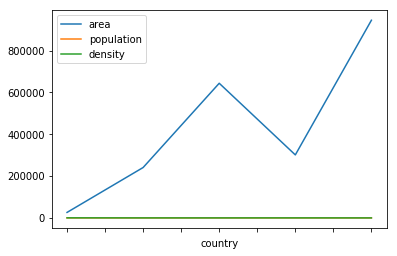

In [33]:
countries.plot()

However, for this dataset, it does not say that much:

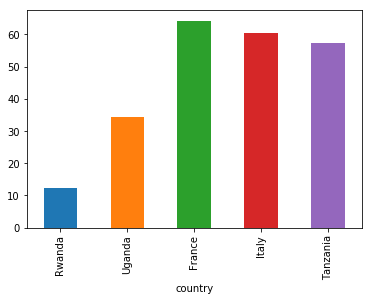

In [37]:
countries['population'].plot(kind='bar')

You can play with the `kind` keyword: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin'

<div class="alert alert-success">
    <b>EXERCISE</b>: Define a `DataFrame` with two columns: price and volume of each beverage. Use the bevarage name as the index. Add the new column ``price of litre``, the data frame according to the values of the column, and plot the values as a bar plot.
</div>

## Some notes on selecting data

Data frames allow for labeling rows and columns, but this makes indexing also a bit more complex compared to 1D NumPy's ``array`` and pandas ``Series``. We now have to distuinguish between:

- selection of rows or columns,
- selection by label or position.

### `[]` provides some convenience shortcuts 

For a ``DataFrame``, basic indexing selects the columns.

Selecting a single column:

In [38]:
countries['area']

country
Rwanda       26338
Uganda      241037
France      643801
Italy       301338
Tanzania    945087
Name: area, dtype: int64

or **multiple columns** using fancy indexing:

In [39]:
countries[['area', 'population']]

,area,population
country,,
Rwanda,26338,12.2
Uganda,241037,34.5
France,643801,64.3
Italy,301338,60.6
Tanzania,945087,57.3


But, slicing accesses the **rows**:

In [40]:
countries['France':'Tanzania']

,area,capital,population,density
country,,,,
France,643801,Paris,64.3,99.875583
Italy,301338,Rome,60.6,201.103080
Tanzania,945087,Dodoma,57.3,60.629339


We can also select rows similarly to the boolean indexing in numpy. The boolean mask should be 1-dimensional and the same length as the thing being indexed. Boolean indexing of `DataFrame`  can be used like the `WHERE` clause of SQL to select **rows** matching some criteria:

In [41]:
countries[countries['area'] > 100000]

,area,capital,population,density
country,,,,
Uganda,241037,Kampala,34.5,143.131552
France,643801,Paris,64.3,99.875583
Italy,301338,Rome,60.6,201.103080
Tanzania,945087,Dodoma,57.3,60.629339


So as a summary, `[]` provides the following convenience shortcuts:

<table>
<tr>
<td></td>
<td>NumPy/`Series`</td>
<td>`DataFrame`</td>
</tr>
<tr>
<td>Integer index<br>`data[label]`</td>
<td>single element</td>
<td>single **column**</td>
</tr>
<tr>
<td>Slice<br>`data[label1:label2]`</td>
<td>sequence</td>
<td>one or more **rows**</td>
</tr>
<tr>
<td>Fancy indexing<br>`data[[label1,label2]]`</td>
<td>sequence</td>
<td>one or more **columns**</td>
</tr>
<tr>
<td>Boolean indexing<br>`data[mask]`</td>
<td>sequence</td>
<td>one or more **rows**</td>
</tr>
</table>

#### Exercise:

Calculate the area of Rwanda relative to the total area of all other countries in the data frame. 

*Hint*: you can compare the index of the data frame to any string

### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

These methods index the different dimensions of the frame:

* `df.loc[row_indexer, column_indexer]`
* `df.iloc[row_indexer, column_indexer]`

Selecting a single element:

In [ ]:
countries.loc['Rwanda', 'area']

But the row or column indexer can also be a list, slice, boolean array, ..

In [ ]:
countries.loc['France':'Tanzania', ['area', 'population']]

---
Selecting by position with `iloc` works similar as indexing numpy arrays:

In [42]:
countries.iloc[:2,1:3]

,capital,population
country,,
Rwanda,Kigali,12.2
Uganda,Kampala,34.5


The different indexing methods can also be used to assign data:

In [ ]:
countries2 = countries.copy()
countries2.loc['Rwanda':'Italy', 'population'] = 10

In [ ]:
countries2

#### EXERCISE: 

Add a column `density` with the population density (note: population column is expressed in millions)

#### EXERCISE: 

List names, capitals and population densities of two countries with highest population density.


## Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [ ]:
pd.read_csv('/path/file_to_read')

In [ ]:
countries.to_csv('/path/file_to_save')